#### Arbitrary Value Imputation

this technique was derived from kaggle competition
It consists of replacing NAN by an arbitrary value

In [51]:
import pandas as pd

In [52]:
df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [53]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)
    

In [54]:
impute_nan(df,"Age")

In [55]:
df

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,0.0,100.0
889,1,26.0,30.0000,26.0,26.0


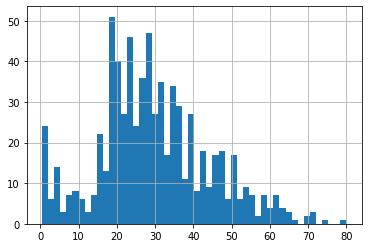

In [56]:
df['Age'].hist(bins=50)

 
### Advantages

- Easy to implement
- Captures the importance of missingess if there is one

### Disadvantages

- Distorts the original distribution of the variable
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use

##### How To Handle Categroical Missing Values

##### Frequent Category Imputation

In [57]:
df.columns

Index(['Survived', 'Age', 'Fare', 'Age_zero', 'Age_hundred'], dtype='object')

In [58]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType'])

In [59]:
df.shape

(1459, 3)

In [60]:
df.isnull().sum()

BsmtQual        44
FireplaceQu    730
GarageType      76
dtype: int64

In [61]:
df.isnull().mean()

BsmtQual       0.030158
FireplaceQu    0.500343
GarageType     0.052090
dtype: float64

### Compute the frequency with every feature

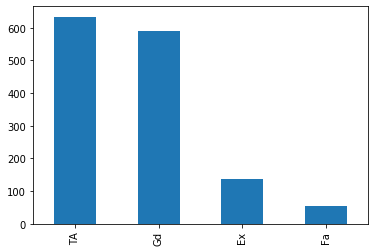

In [62]:
df['BsmtQual'].value_counts().plot.bar()

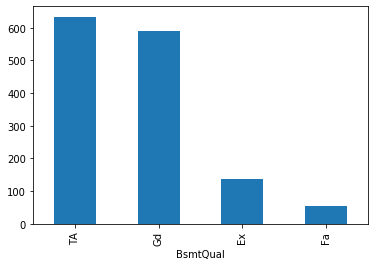

In [63]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

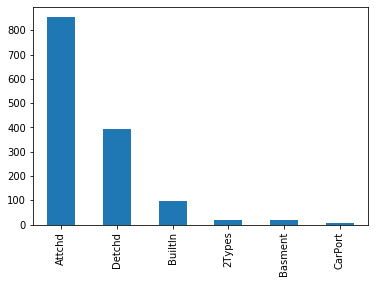

In [64]:
df['GarageType'].value_counts().plot.bar()

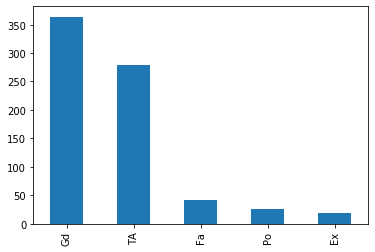

In [65]:
df['FireplaceQu'].value_counts().plot.bar()

In [66]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [67]:
df['GarageType'].mode()[0]

'Attchd'

In [68]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [69]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [70]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
dtype: float64

#### Advantages
1. Easy To implement
2. Fater way to implement
#### Disadvantages
1. Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
2. It distorts the relation of the most frequent label

##### Adding a variable to capture NAN

In [71]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType'])
df.head()

,BsmtQual,FireplaceQu,GarageType
0,TA,NaN,Attchd
1,TA,NaN,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Attchd
4,Gd,NaN,Attchd


In [72]:
import numpy as np
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [73]:
df.head()

,BsmtQual,FireplaceQu,GarageType,BsmtQual_Var
0,TA,NaN,Attchd,0
1,TA,NaN,Attchd,0
2,Gd,TA,Attchd,0
3,TA,Gd,Attchd,0
4,Gd,NaN,Attchd,0


In [74]:
frequent=df['BsmtQual'].mode()[0]

In [75]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [76]:
df.head()

,BsmtQual,FireplaceQu,GarageType,BsmtQual_Var
0,TA,NaN,Attchd,0
1,TA,NaN,Attchd,0
2,Gd,TA,Attchd,0
3,TA,Gd,Attchd,0
4,Gd,NaN,Attchd,0


In [77]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [78]:
df.head()

,BsmtQual,FireplaceQu,GarageType,BsmtQual_Var,FireplaceQu_Var
0,TA,Gd,Attchd,0,1
1,TA,Gd,Attchd,0,1
2,Gd,TA,Attchd,0,0
3,TA,Gd,Attchd,0,0
4,Gd,Gd,Attchd,0,1


#### Suppose if you have more frequent categories, we just replace NAN with a new category

In [79]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType'])

In [80]:
df.head()

,BsmtQual,FireplaceQu,GarageType
0,TA,NaN,Attchd
1,TA,NaN,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Attchd
4,Gd,NaN,Attchd


In [81]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [82]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [83]:
df.head()

,BsmtQual,FireplaceQu,GarageType,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,TA,NaN,Attchd,TA,Missing,Attchd
1,TA,NaN,Attchd,TA,Missing,Attchd
2,Gd,TA,Attchd,Gd,TA,Attchd
3,TA,Gd,Attchd,TA,Gd,Attchd
4,Gd,NaN,Attchd,Gd,Missing,Attchd


In [84]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [85]:
df.head()

,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,TA,Missing,Attchd
1,TA,Missing,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Attchd
4,Gd,Missing,Attchd
